## Hierarchical Clustering 

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('../data/scaled_data.csv')
data.head()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,-0.392882,0.852930,0.712033,0.674466,-1.116351,-0.253086,1.102759,-1.082287
1,-0.028158,0.727843,0.223398,0.718372,-1.155872,0.482207,0.865095,-0.094850
2,-0.464417,1.236532,0.341141,0.718372,-1.274437,1.190268,1.102759,0.658999
3,-0.252836,0.953000,0.405900,1.047665,-0.444485,-0.443718,1.102759,1.019997
4,-0.150740,1.244871,1.512687,1.113524,-0.286399,2.585965,1.102759,0.903203


In [3]:
data.shape

(300, 8)

In [4]:
data.describe()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,4.736952e-17,1.539509e-16,6.039613e-16,4.736952e-17,-9.473903e-17,8.052818e-16,-9.473903e-17,1.184238e-16
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-1.291259e+00,-1.957370e+00,-2.372841e+00,-1.828163e+00,-1.946302e+00,-2.772148e+00,-2.462194e+00,-3.396922e+00
25%,-7.102530e-01,-7.669533e-01,-5.831431e-01,-7.963776e-01,-6.816141e-01,-6.564766e-01,-7.985493e-01,-6.124581e-01
50%,-2.892752e-01,-1.434337e-02,4.089616e-02,-2.802652e-02,-1.480739e-01,-6.926285e-02,1.521046e-01,7.503099e-02
75%,2.951737e-01,7.716233e-01,7.606018e-01,7.238598e-01,5.830738e-01,5.775233e-01,1.102759e+00,6.802338e-01
max,3.520347e+00,2.412355e+00,1.512687e+00,3.133189e+00,2.954364e+00,2.674472e+00,1.102759e+00,2.548930e+00


### Agglomerative Clustering

In [5]:
agg= AgglomerativeClustering(4)

In [6]:
agg.fit(data)

AgglomerativeClustering(n_clusters=4)

In [7]:
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       3, 3, 3, 0, 3, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [8]:
Counter(agg.labels_)

Counter({np.int64(0): 120, np.int64(1): 107, np.int64(2): 37, np.int64(3): 36})

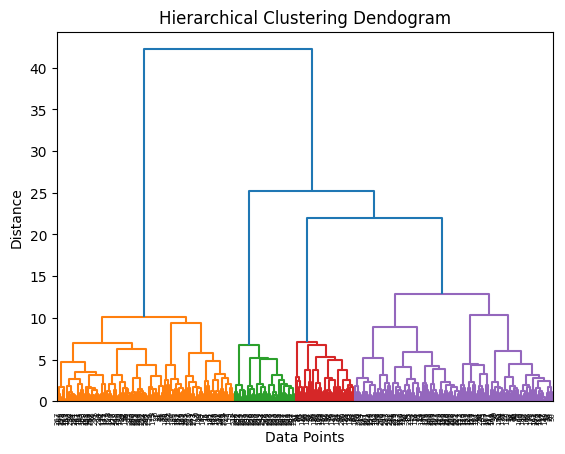

In [9]:
linkage_matrix = linkage(data, method='ward')
dendogram_info = dendrogram(linkage_matrix,color_threshold = 15)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [10]:
agg_engg = AgglomerativeClustering(4)
agg_engg.fit(data)

AgglomerativeClustering(n_clusters=4)

In [11]:
agg_engg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       3, 3, 3, 0, 3, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [12]:
Counter(agg_engg.labels_)

Counter({np.int64(0): 120, np.int64(1): 107, np.int64(2): 37, np.int64(3): 36})

#### Visualizing using Cluster Maps

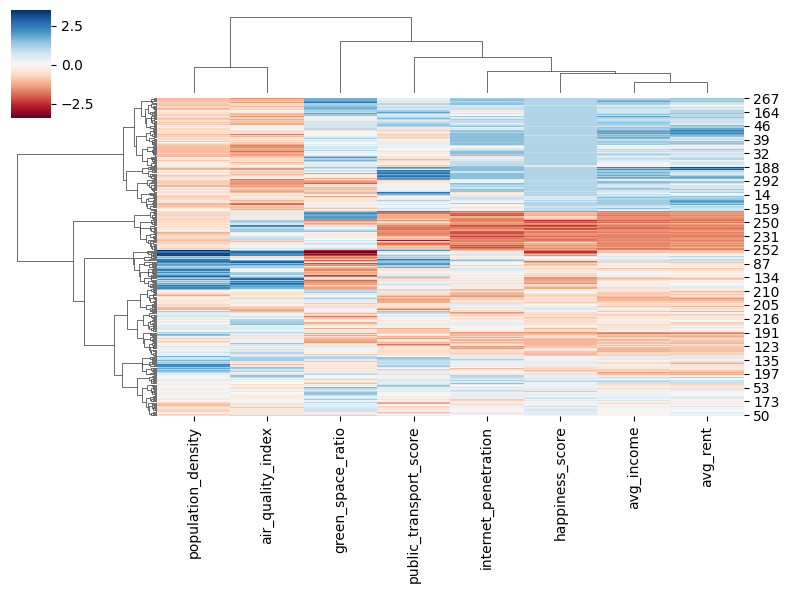

In [13]:
sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8,6),
               xticklabels= data.columns)
plt.show()

**Cluster 1 — High-income, high-happiness, high-rent regions**

- Strong blue for avg_income, avg_rent, happiness_score
- Moderate density

Interpretation: Affluent urban centers (High-income, expensive, well-developed)

---
**Cluster 2 — Low-income, low-internet, low-happiness areas**

- Red for income, rent, internet penetration, happiness

Interpretation: Economically disadvantaged / underserved regions

---
**Cluster 3 — High-density, poor air quality areas** 
- Deep blue for population_density, 
- Deep blue for air_quality_index
- Slightly red for green space
- Mixed on income/rent

Interpretation: Dense, polluted, lower-comfort urban areas

---

**Cluster 4 — Mixed-density, high green space, good environment**

- Mixed for population_density, air_quality_index, green_space_ratio
- Mid-range socioeconomic features

Interpretation: Stable Middle-Range Profile, Suburban or eco-friendly regions

---
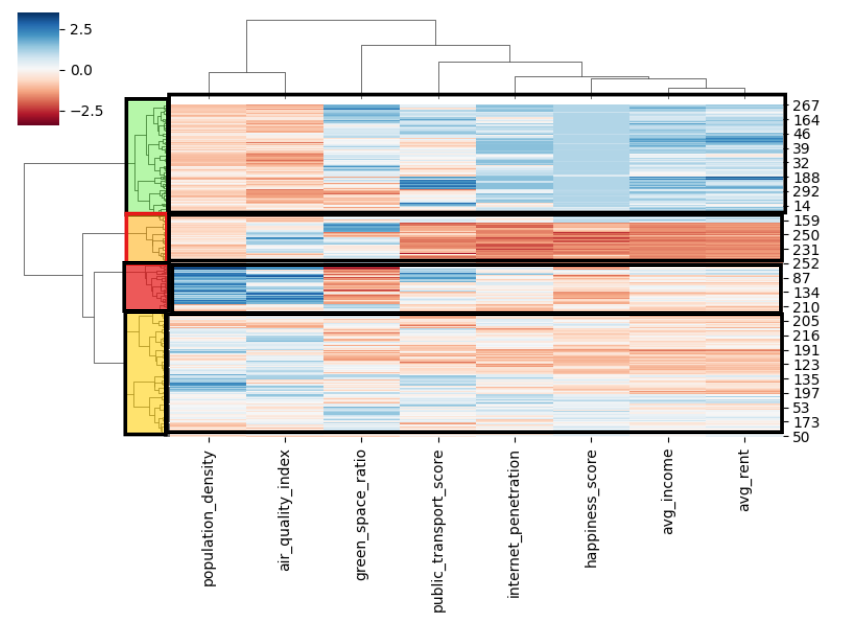


